<a href="https://colab.research.google.com/github/RISHABH9SHARMA/SSRS/blob/main/DL_ploject/cotton_plant_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Project: Cotton Plant Disease Prediction 
 
#import libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [ ]:
keras.__version__

'2.7.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data_path = 'drive/MyDrive/Datasets/test'
validation_data_path = 'drive/MyDrive/Datasets/val'
 

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
 

In [ ]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [ ]:
# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='binary')  
training_data.class_indices

Found 106 images belonging to 4 classes.


{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

Found 253 images belonging to 4 classes.


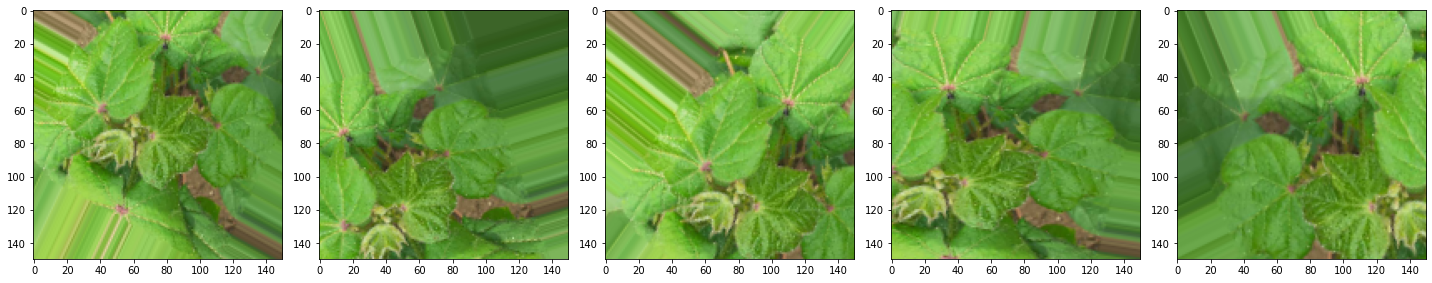

In [ ]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)
 
# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')
 
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)
 
model_path = '/content/drive/My Drive/My ML Project /DL Project/CNN/cotton plant disease prediction/v3_red_cott_dis.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
 

In [ ]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])
 

In [ ]:
# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=500, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) # time start 16.06
 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
4/4 [==============================] - ETA: 0s - loss: 1.4026 - accuracy: 0.2264
Epoch 00001: val_accuracy improved from -inf to 0.30040, saving model to /content/drive/My Drive/My ML Project /DL Project/CNN/cotton plant disease prediction/v3_red_cott_dis.h5
4/4 [==============================] - 90s 29s/step - loss: 1.4026 - accuracy: 0.2264 - val_loss: 1.3731 - val_accuracy: 0.3004
Epoch 2/500
4/4 [==============================] - ETA: 0s - loss: 1.3927 - accuracy: 0.2642
Epoch 00002: val_accuracy improved from 0.30040 to 0.47826, saving model to /content/drive/My Drive/My ML Project /DL Project/CNN/cotton plant disease prediction/v3_red_cott_dis.h5
4/4 [==============================] - 15s 4s/step - loss: 1.3927 - accuracy: 0.2642 - val_loss: 1.3432 - val_accuracy: 0.4783
Epoch 3/500
4/4 [==============================] - ETA: 0s - loss: 1.3807 - accuracy: 0.2925
Epoch 00003: val_accuracy did not improve from 0.47826
4/4 [==============================] - 14s 4s/step -

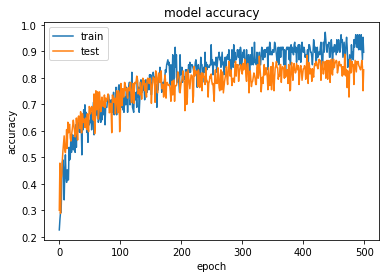

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

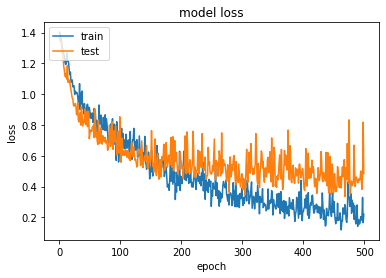

{'accuracy': [0.22641509771347046,
  0.2641509473323822,
  0.2924528419971466,
  0.2924528419971466,
  0.40566039085388184,
  0.4811320900917053,
  0.49056604504585266,
  0.4528301954269409,
  0.3396226465702057,
  0.4433962404727936,
  0.5094339847564697,
  0.4245283007621765,
  0.40566039085388184,
  0.4528301954269409,
  0.4150943458080292,
  0.4150943458080292,
  0.5377358198165894,
  0.49056604504585266,
  0.5,
  0.5849056839942932,
  0.5188679099082947,
  0.5660377144813538,
  0.5849056839942932,
  0.5283018946647644,
  0.5377358198165894,
  0.5754716992378235,
  0.5188679099082947,
  0.6226415038108826,
  0.5377358198165894,
  0.6037735939025879,
  0.6320754885673523,
  0.6320754885673523,
  0.6226415038108826,
  0.5943396091461182,
  0.6415094137191772,
  0.5943396091461182,
  0.6226415038108826,
  0.5094339847564697,
  0.6415094137191772,
  0.6037735939025879,
  0.6792452931404114,
  0.6226415038108826,
  0.698113203048706,
  0.650943398475647,
  0.6698113083839417,
  0.594339

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 
history.history